In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

<Figure size 1000x600 with 0 Axes>

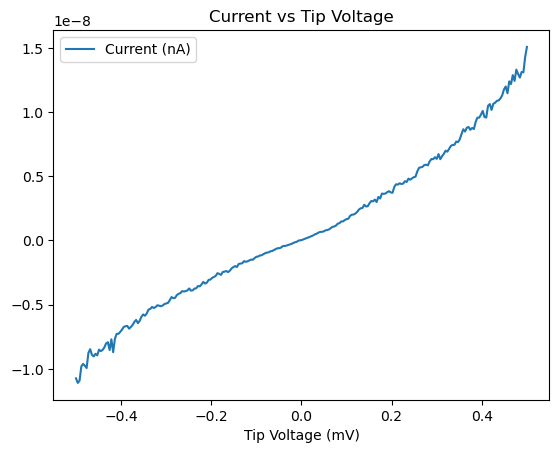

C:\Users\lj22452\AppData\Local\Temp\ipykernel_2888\1581473655.py:15: RuntimeWarning: invalid value encountered in log
  log_current = np.log(spectroscopy["Current (nA)"].to_numpy())
C:\Users\lj22452\AppData\Local\Temp\ipykernel_2888\1581473655.py:16: RuntimeWarning: invalid value encountered in log
  log_voltage = np.log(spectroscopy["Tip Voltage (mV)"].to_numpy())


<Figure size 1000x600 with 0 Axes>

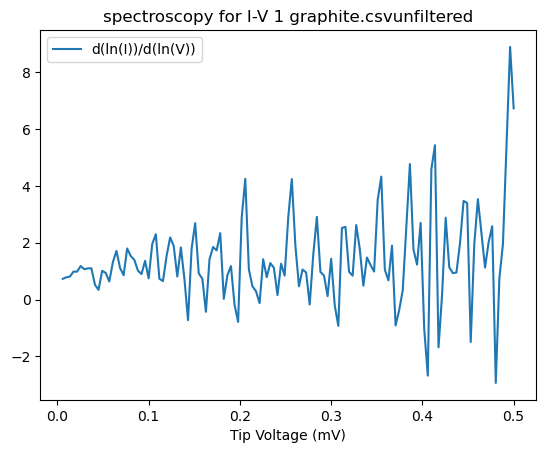

<Figure size 1000x600 with 0 Axes>

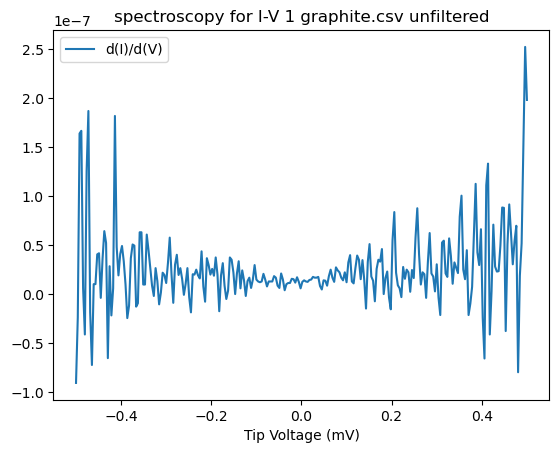

In [11]:
file_name = "spectroscopy for I-V 1 graphite.csv"

# Load the data
spectroscopy = pd.read_csv(f"Worthwhile Scans\\Spectroscopy CSVs\\Graphite\\{file_name}",
                           names=["Tip Voltage (mV)", "Current (nA)"],
                           sep=";")

# Plot the current vs voltage with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "Current (nA)")
plt.title("Current vs Tip Voltage")
plt.show()

# Calculate the logs and gradient
log_current = np.log(spectroscopy["Current (nA)"].to_numpy())
log_voltage = np.log(spectroscopy["Tip Voltage (mV)"].to_numpy())
spectroscopy["d(ln(I))/d(ln(V))"] = np.gradient(log_current, log_voltage)
spectroscopy["d(I)/d(V)"] = np.gradient(spectroscopy["Current (nA)"], spectroscopy["Tip Voltage (mV)"])

# Plot the derivative with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "d(ln(I))/d(ln(V))")
plt.title(file_name + "unfiltered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()

# Plot the derivative with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "d(I)/d(V)")
plt.title(file_name + " unfiltered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()


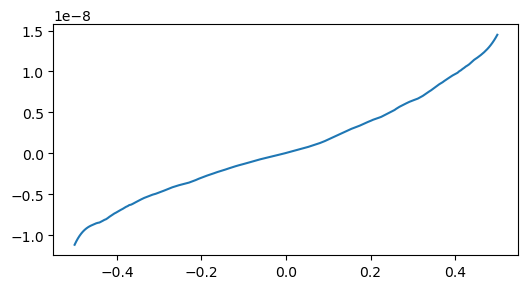

<Figure size 1000x600 with 0 Axes>

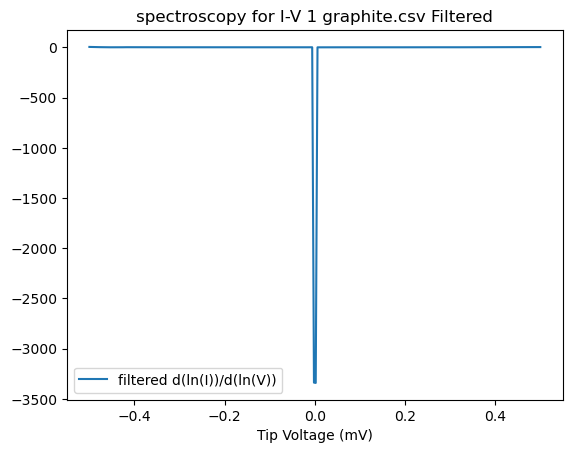

<Figure size 1000x600 with 0 Axes>

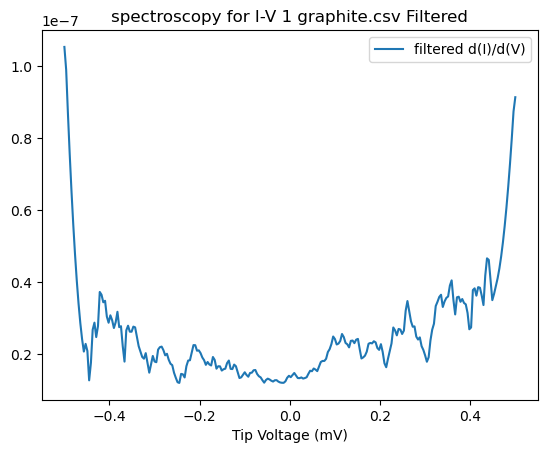

In [13]:
spectroscopy_filtered = savgol_filter(spectroscopy["Current (nA)"], window_length = 25, polyorder = 3, mode = 'interp')
plt.figure(figsize=(6, 3))  # Set figure size (width, height)
plt.plot(spectroscopy["Tip Voltage (mV)"], spectroscopy_filtered)
plt.show()

# Calculate the logs and gradient
log_current = np.log(np.abs(spectroscopy_filtered))
log_voltage = np.log(np.abs(spectroscopy["Tip Voltage (mV)"]))

spectroscopy["filtered d(ln(I))/d(ln(V))"] = np.gradient(log_current, log_voltage)
spectroscopy["filtered d(I)/d(V)"] = np.gradient(spectroscopy_filtered, spectroscopy["Tip Voltage (mV)"])

# Plot the derivative with an increased figure size
plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "filtered d(ln(I))/d(ln(V))")
plt.title(file_name + " Filtered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()

plt.figure(figsize=(10, 6))  # Set figure size (width, height)
spectroscopy.plot("Tip Voltage (mV)", "filtered d(I)/d(V)")
plt.title(file_name + " Filtered")
#plt.xlim(-0.01, 0.01)  # Uncomment if needed
plt.show()

Here you can visually see the maxima

### Noteworthy rows

Derivative around Tip Voltage = _approx 0_

In [26]:
display(spectroscopy[123:133])

,Tip Voltage (mV),Current (nA),d(ln(I))/d(ln(V)),d(I)/d(V),filtered d(ln(I))/d(ln(V)),filtered d(I)/d(V)
123,-0.017648,-1.831054e-10,NaN,1.556398e-08,1.134003,1.210539e-08
124,-0.013726,-1.342773e-10,NaN,1.206208e-08,1.177598,1.209412e-08
125,-0.009804,-8.850088e-11,NaN,1.750948e-08,1.337403,1.251562e-08
126,-0.005883,3.051851e-12,NaN,1.284028e-08,1.397997,1.350480e-08
127,-0.001961,1.220712e-11,NaN,6.225592e-09,-3338.500237,1.404653e-08
128,0.001960,5.187998e-11,NaN,1.284028e-08,-3341.602072,1.366495e-08
129,0.005882,1.129151e-10,0.729816,1.439668e-08,0.705552,1.424029e-08
130,0.009803,1.647950e-10,0.784271,1.322938e-08,0.810514,1.482811e-08
131,0.013725,2.166749e-10,0.810669,1.284028e-08,0.818760,1.410397e-08
132,0.017647,2.655030e-10,0.983653,1.478578e-08,0.817394,1.341457e-08
